# Neuronal Network on MNIST data

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import special
import random
%matplotlib inline

In [6]:
df = pd.read_csv("mnist_data.csv")
df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Split Label and Features
y = pd.DataFrame(df["7"])
X = df.drop("7", axis=1)

# Convert data to image_data
X_list_28 = []

for i in range(0,len(X)):
    img = np.array(X.loc[i]).reshape((28,28))
    X_list_28.append(img)

len(X_list_28)

9999

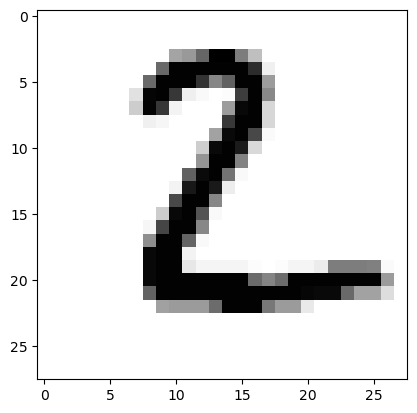

In [192]:
# Show random image of drawn number

rnd = random.randint(0,len(X_list_28))

plt.imshow(X_list_28[0], cmap="Greys")

In [256]:
# Split test/train and scale data

minmax = MinMaxScaler(feature_range=(0.01, 1))
X_scaled = minmax.fit_transform(X)
y_enc = pd.get_dummies(y, columns=["7"], dtype=int).values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [254]:
print(y_train)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [260]:
# Manual neuronal network (only forward)

input_neurons = 784
hidden_neurons = 100
output_neurons = 10

np.random.seed(42)
W_1 = np.random.uniform(-0.5, 0.5, (hidden_neurons,input_neurons))
W_2 = np.random.uniform(-0.5, 0.5, (output_neurons,hidden_neurons))

def test_neuronal_network(X, w1, w2):
    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T

    X_1 = np.dot(w1,input_vector)
    O_1 = special.expit(X_1)

    X_2 = np.dot(w2,O_1)
    O_2 = special.expit(X_2)

    return O_1, O_2

# Results for first test dataset
O_1, O_2 = test_neuronal_network(X_train, W_1, W_2)
print(O_2[0])

[0.4720875  0.24102295 0.27389481 ... 0.52106104 0.23963955 0.4023102 ]


In [282]:
# Debug array shapes

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"W_1: {W_1.shape}")
print(f"W_2: {W_2.shape}")
print(f"O_1: {O_1.shape}")
print(f"O_2: {O_2.shape}")

X_train: (7999, 784)
y_train: (7999, 10)
W_1: (100, 784)
W_2: (10, 100)
O_1: (100, 1)
O_2: (10, 1)


In [298]:
# Extended neuronal network with back propagation

learning_rate = 0.0001

def train_neuronal_network(X, w1, w2, y, alpha):
    w1_new = 0
    w2_new = 0

    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T
    
    O_1, O_2 = test_neuronal_network(X, w1, w2)

    error_output = targets - O_2
    error_hidden = np.dot(w2.T, error_output)

    w1_new += alpha * np.dot((error_hidden * output[0]*(1-output[0])),np.transpose(input_vector))
    w2_new += alpha * np.dot((error_output * output[1]*(1-output[1])),np.transpose(O_1))


    return w1_new, w2_new #output, error_output, error_hidden, input_vector, targets,

W_1_new, W_2_new = train_neuronal_network(X_train, W_1, W_2, y_train, learning_rate)
print(f" W_1_new: {W_1_new.shape}")
print(f" W_2_new: {W_2_new.shape}")
print(f" W_2_new: {W_2_new[0]}")

 W_1_new: (100, 784)
 W_2_new: (10, 100)
 W_2_new: [-0.01356431 -0.03682874 -0.01453084 -0.03705223 -0.01806884 -0.03314123
 -0.02936257 -0.01368722 -0.02684978 -0.00652949 -0.0070171  -0.02898174
 -0.02466943 -0.03657402 -0.01466743 -0.02569861 -0.00937338 -0.0211917
 -0.02744673 -0.01777131 -0.03858593 -0.04208577 -0.03773897 -0.02323966
 -0.03490158 -0.03362903 -0.03071119 -0.03942819 -0.0431144  -0.02911151
 -0.0199302  -0.0208675  -0.01050683 -0.01434818 -0.01508479 -0.00945055
 -0.02226854 -0.01813765 -0.03872546 -0.02377801 -0.03627513 -0.01904031
 -0.03984741 -0.01223119 -0.0119271  -0.02933157 -0.02091472 -0.04037399
 -0.01253576 -0.03337162 -0.0270622  -0.03236742 -0.03468433 -0.01553618
 -0.02145596 -0.00727686 -0.02398995 -0.038909   -0.03570601 -0.04052568
 -0.02956904 -0.00436912 -0.00649294 -0.00394901 -0.03403269 -0.03287036
 -0.02397761 -0.00622353 -0.01577275 -0.01838537 -0.02915201 -0.02702529
 -0.04104919 -0.03510713 -0.02202752 -0.02185063 -0.00776449 -0.02114158
 

In [364]:
# Train 100 additional epochs

for i in range(1000):
    W_1_new, W_2_new = train_neuronal_network(X_train, W_1_new, W_2_new, y_train, learning_rate)
    if i == 999:
        print("Training over!")

Training over!


In [366]:
print(f" W_2_new: {W_2_new[0]}")

 W_2_new: [-0.01769382 -0.01737479 -0.01769345 -0.01752102 -0.01785517 -0.01777907
 -0.01776046 -0.01796436 -0.01795797 -0.01742061 -0.0173006  -0.01784076
 -0.01779491 -0.01769536 -0.01766881 -0.01783172 -0.01755724 -0.0178094
 -0.0178734  -0.01777516 -0.01749471 -0.01718591 -0.01746376 -0.01799986
 -0.01761898 -0.0177212  -0.01761528 -0.01731675 -0.01707134 -0.01768865
 -0.01786663 -0.01777085 -0.0173446  -0.01762761 -0.01746828 -0.01751682
 -0.01776763 -0.01784583 -0.01727186 -0.01787228 -0.01729348 -0.01778301
 -0.01744297 -0.01752119 -0.01757021 -0.0177063  -0.01778573 -0.01724523
 -0.01766108 -0.01756845 -0.01774453 -0.01746822 -0.01760882 -0.01793578
 -0.01785074 -0.01736975 -0.01779759 -0.01728998 -0.0176306  -0.01717607
 -0.01762133 -0.01707141 -0.01718838 -0.01709179 -0.01753633 -0.01744577
 -0.01766295 -0.01741776 -0.01766343 -0.01786519 -0.01771848 -0.01787277
 -0.01732432 -0.01775927 -0.01779384 -0.017753   -0.01746156 -0.01777053
 -0.01774466 -0.01784041 -0.01796788 -0.01

In [368]:
# Test Neuronal Network after Training
index= 500

O_1, O_2 = test_neuronal_network(X_test, W_1_new, W_2_new)
y_predict = O_2.T
print(np.argmax(y_predict[index]))
print(np.argmax(y_test[index]))
print(y_predict[index])

1
3
[0.28340617 0.35029615 0.28637533 0.3219413  0.288225   0.27687332
 0.29479507 0.30313547 0.2283058  0.26061341]


In [348]:
O_2.T.shape

(2000, 10)

In [350]:
y_test.shape

(2000, 10)

In [374]:
# Performance Calculation

def performance_neuronal_network(y_test, y_predict):
    correct = []
    for i in range(0, len(y_test)):
        if np.argmax(y_predict[i]) == np.argmax(y_test[i]):
            correct.append(i)
    performance = len(correct)/len(y_test)
    return performance, correct

perf, perf_list = performance_neuronal_network(y_test, y_predict)

print(perf)

0.109
